In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sales_processing import add_date_features, normalize_sales, denormalize_sales, fill_in_dates
from holiday_processing import add_holidays
from weather_processing import add_weather_info


In [3]:
sales = pd.read_csv('./data/caspecoTrainingData.csv')

sales = fill_in_dates(sales, pd.date_range('2020-01-01', '2023-01-04'))

# sales = add_date_features(sales)

holidays = pd.read_csv('./data/swedish_holidays.csv')

weather = pd.read_csv('./data/uppsala_weather.csv')

sales = add_holidays(sales, holidays)

sales = add_weather_info(sales, weather)

sales = add_date_features(sales)

sales.head(20)
sales[sales['Holiday'] == 1].head(20)

# convert weather to ints instead of strings


sales[sales['Holiday'] == 1].head(20)

# drop conditions coloumn





TypeError: expected string or bytes-like object

In [10]:
dates = pd.date_range('2020-01-01', '2023-01-04', freq='D')
sales['Sales'] = sales.groupby('Company')['Sales'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()))
sales['Date'] = pd.to_datetime(sales['Date'])
# if there is a company which has no row for a date, we add a row with 0 sales
for company in sales['Company'].unique():
    for date in dates:
        if not date in sales[sales['Company'] == company]['Date'].values:
            sales = pd.concat([sales, pd.DataFrame({'Company': [company], 'Date': [date], 'Sales': [0]})])

sales['Date'] = pd.to_datetime(sales['Date'])
sales = sales.sort_values(by=['Date', 'Company'])
sales.head(20)

,Date,Company,Sales,Holiday,temp,windspeed,conditions,Day,Week,Month,Year,Weekday,Weekend
0,2020-01-01,0,0.000000,1,3.3,27.9,1,1,1,1,2020,2,0
1,2020-01-01,1,0.000187,1,3.3,27.9,1,1,1,1,2020,2,0
2,2020-01-01,2,0.037975,1,3.3,27.9,1,1,1,1,2020,2,0
3,2020-01-02,0,0.154561,0,6.0,41.8,1,2,1,1,2020,3,0
4,2020-01-02,1,0.241167,0,6.0,41.8,1,2,1,1,2020,3,0
5,2020-01-02,2,0.118269,0,6.0,41.8,1,2,1,1,2020,3,0
6,2020-01-03,0,0.392961,0,5.7,38.7,2,3,1,1,2020,4,1
7,2020-01-03,1,0.396928,0,5.7,38.7,2,3,1,1,2020,4,1
8,2020-01-03,2,0.151214,0,5.7,38.7,2,3,1,1,2020,4,1
9,2020-01-04,0,0.491801,0,1.8,35.0,0,4,1,1,2020,5,1


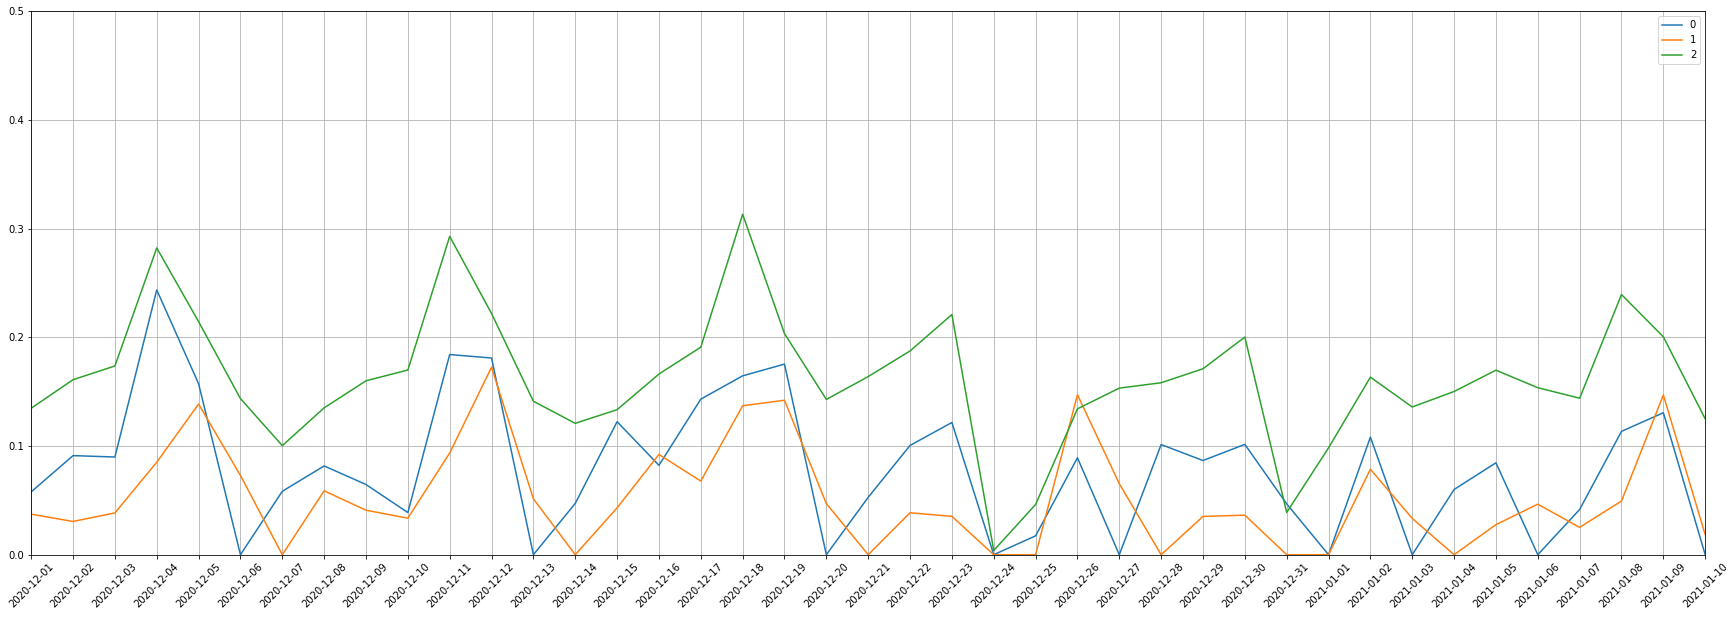

In [63]:
#plot the sales of each company in same plot
# make fig size 30x10
# normalize sales for each company
daterange = pd.date_range('2020-12-01', '2021-01-10', freq='D')

plt.figure(figsize=(30,10))
for company in [0,1,2]:
    plt.plot(sales[sales['Company'] == company]['Date'], sales[sales['Company'] == company]['Sales'])
plt.legend(sales['Company'].unique())
plt.xlim(daterange[0], daterange[-1])
plt.ylim(0, 0.5)
# plot each date on xtick
plt.xticks(daterange, rotation=45)
plt.grid()
plt.show()

In [64]:
sales['Day'] = sales['Date'].dt.day
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year
sales['Weekday'] = sales['Date'].dt.weekday

sales.tail(30)

,Date,Company,Sales,Day,Week,Month,Year,Weekday,Weekend,Weekeend
0,2022-12-26,0,0.000000,26,NaN,12,2022,0,NaN,NaN
26,2022-12-26,1,0.433814,26,52.0,12,2022,0,False,0.0
25,2022-12-26,2,0.237831,26,52.0,12,2022,0,False,0.0
22,2022-12-27,0,0.255564,27,52.0,12,2022,1,False,0.0
24,2022-12-27,1,0.194780,27,52.0,12,2022,1,False,0.0
23,2022-12-27,2,0.317944,27,52.0,12,2022,1,False,0.0
19,2022-12-28,0,0.313189,28,52.0,12,2022,2,False,0.0
20,2022-12-28,1,0.253908,28,52.0,12,2022,2,False,0.0
21,2022-12-28,2,0.305549,28,52.0,12,2022,2,False,0.0
18,2022-12-29,0,0.319720,29,52.0,12,2022,3,False,0.0


In [65]:
holidays = pd.read_csv('./data/Swedish holidays.csv')
# turn every 24th of december into a holiday
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays = holidays.append({'Date': pd.to_datetime('2020-12-24')}, ignore_index=True)
holidays = holidays.append({'Date': pd.to_datetime('2021-12-24')}, ignore_index=True)
holidays = holidays.append({'Date': pd.to_datetime('2022-12-24')}, ignore_index=True)
# turn every 30th of april into a holiday
holidays = holidays.append({'Date': pd.to_datetime('2020-04-30')}, ignore_index=True)
holidays = holidays.append({'Date': pd.to_datetime('2021-04-30')}, ignore_index=True)
holidays = holidays.append({'Date': pd.to_datetime('2022-04-30')}, ignore_index=True)
holidays.sort_values(by='Date', inplace=True)
sales['Holiday'] = sales['Date'].isin(holidays['Date']).astype(int)
sales.head()

# plot the sales of each company in same plot with holidays as vertical lines
# make fig size 120x10
plt.figure(figsize=(400,10))
for company in [0,1,2]:
  plt.plot(sales[sales['Company'] == company]['Date'], sales[sales['Company'] == company]['Sales'])
plt.legend(sales['Company'].unique())
plt.ylim(0, 1)
# plot each date on xtick
# x ticks as date and weekday
plt.xticks(sales['Date'][::3], labels=list(zip(sales['Month'], sales['Day'], sales['Weekday'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})))[::3], rotation=80)
plt.grid()
# plot holidays as vertical lines
for holiday in holidays['Date']:
  plt.axvline(holiday, color='r')
plt.show()

<ipython-input-65-3faef99e25cc>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holidays = holidays.append({'Date': pd.to_datetime('2020-12-24')}, ignore_index=True)
<ipython-input-65-3faef99e25cc>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holidays = holidays.append({'Date': pd.to_datetime('2021-12-24')}, ignore_index=True)
<ipython-input-65-3faef99e25cc>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holidays = holidays.append({'Date': pd.to_datetime('2022-12-24')}, ignore_index=True)
<ipython-input-65-3faef99e25cc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holidays = holidays.append({'Date': pd.to_datetime('2020-04-30

KeyboardInterrupt: 

In [ ]:
sales['Closed'] = (sales['Sales'] == 0).astype(int)
sales.head()

Company       0.642688
Year          0.124556
Weekend       0.056605
Week          0.055183
temp          0.038845
Day           0.024095
Month         0.021998
Weekday       0.015795
Holiday       0.012180
conditions    0.008055
dtype: float64


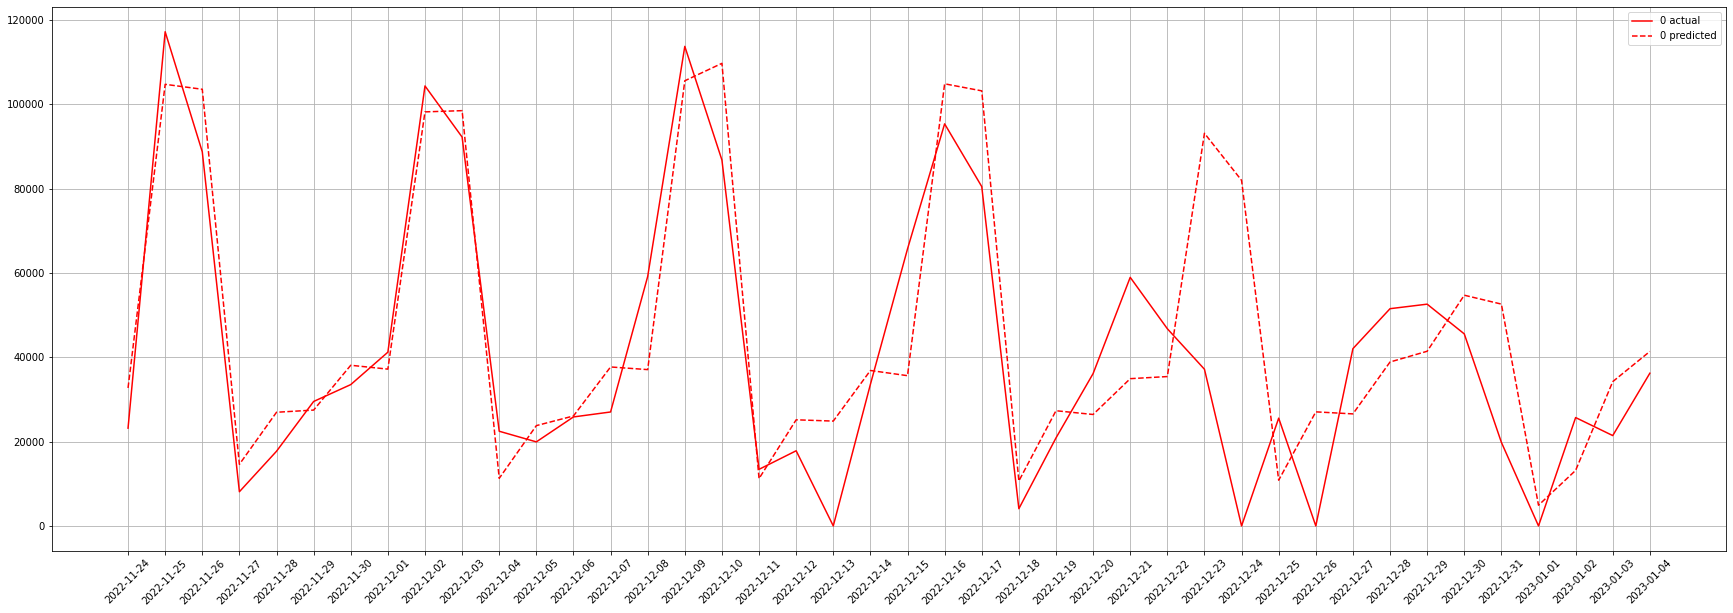

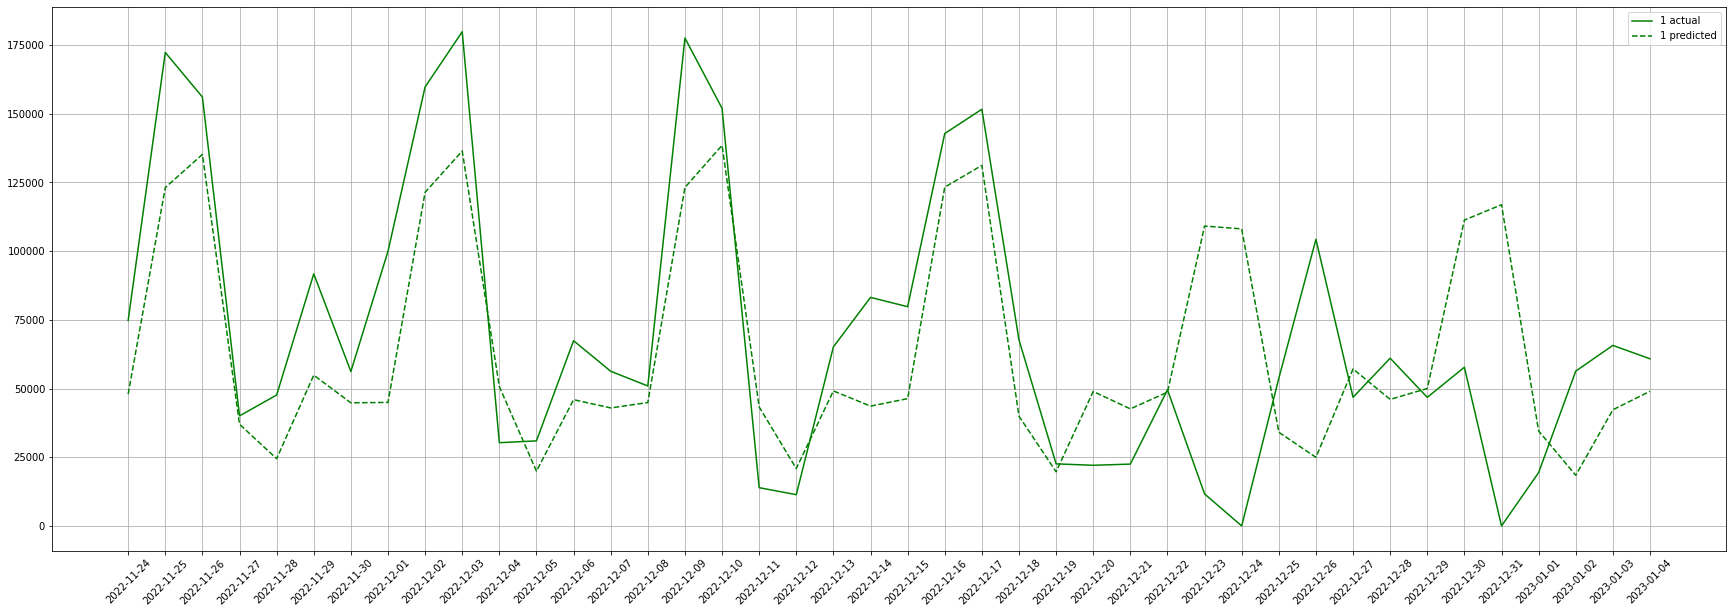

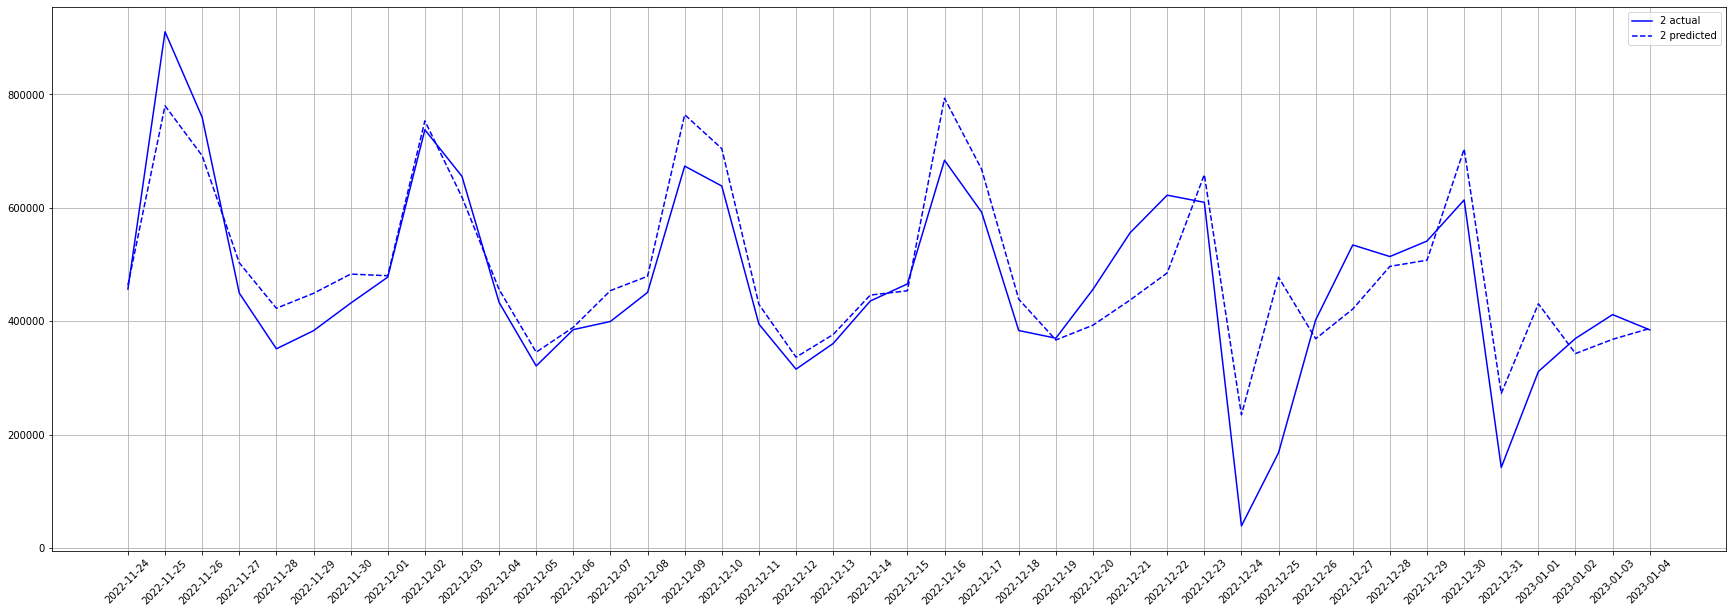

In [5]:
X = sales.drop(['Sales', 'Date'], axis=1)
y = sales['Sales']

days_to_drop = 3 * 21
end_date = 3 * 21
dates = sales['Date'][-(days_to_drop + end_date)::3]

train_x, train_y = X[:-(days_to_drop + end_date)], y[:-(days_to_drop + end_date)]
test_x, test_y = X[-(days_to_drop + end_date):], y[-(days_to_drop + end_date):]

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = [
    RandomForestRegressor()
    
]

for model in models:
  model.fit(train_x, train_y)

  pred_y = model.predict(test_x)

  feature_importance = pd.Series(model.feature_importances_,
            index=train_x.columns).sort_values(ascending=False)
  print(feature_importance)

  #print score
  colors = {0: 'red', 1: 'green', 2: 'blue'}
  
  for company in [0,1,2]:
    plt.figure(figsize=(30, 10))
    company_sales = test_y[test_x['Company'] == company]
    plt.plot(dates, company_sales, label=f'{company} actual', color=colors[company])
    plt.plot(dates, pred_y[test_x['Company'] == company],
            label=f'{company} predicted', linestyle='--', color=colors[company])
    

    plt.xticks(dates, rotation=45)
    plt.grid()
    plt.legend()
